# About  Project 

- The objective of this project is to classify whether someone has `diabetes or not`.
- Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

# About the Dataset

- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history) 
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [**Importing  Libraries**](#1)

1. [**Loading  the  Dataset**](#2)

1. [**Exploratory  Data  Analysis**](#3)

    a. Understanding the dataset

    b. Data Cleaning
         
1. [**Data  Visualization**](#4)
   - Bar Plot :- to see if the dataset is balanced or not
   - Histograms :- to see if data is normally distributed or skewed
   - Box Plot :- to analyse the distribution and see the outliers
   - Scatter plots :- to understand relationship between any two variables
   - Pair plot :- to create scatter plot between all the variables
   - Heatmap :- to find correlation between the variables
 

1. [**Handling  Outliers**](#5)

1. [**Split  the  Data  Frame  into  X  and  y**](#6)

1. [**TRAIN  TEST  SPLIT**](#7)

1. [**Build  the  Classification  Algorithm**](#8)

    8.1  KNN

    8.2  Decision Tree

    8.3  Random Forest

    8.4  SVM

    8.5  Logistic Regression
    
    8.6  Naive Bayes

   #### The models include the following:- 

    a. Hyper Parameter Tuning using GridSearch CV 
  
    b. Fit Best Model
  
    c. Predict on testing data using that model
  
    d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score,Classification Report
   

1. [**Result  and  Conclusion**](#9)
  

# 1. Importing Libraries <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Dataset <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3. Exploratory Data Analysis <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

### a. Understanding the dataset

In [3]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns  #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [7]:
df.nunique() # Unique value in each column

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df["Outcome"].value_counts() #Get count of each class

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.describe()
 #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### b. Data Cleaning

In [10]:
df.drop_duplicates () #dropping duplicate values - checking if there are any duplicate rows and dropping if any

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.isna().sum() #check for missing values, count them and print the sum for every column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Conclusion:
In this dataset their is `no missing` value present.

In [12]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


**NOTE**

Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by `mean value`. SkinThickness, Insulin,BMI have skewed distributions hence `median` is a better choice as it is less affected by outliers.

In [13]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

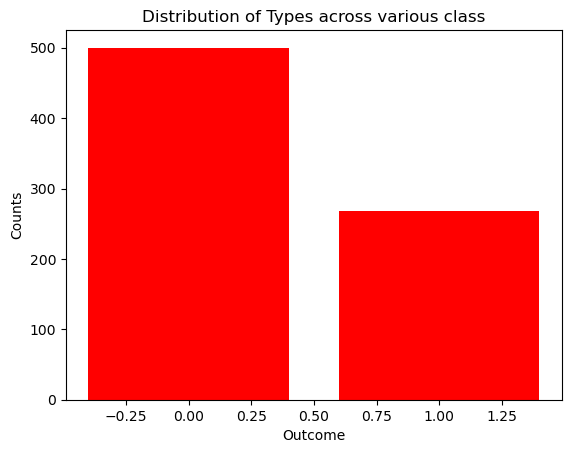

In [14]:
plt.bar(df["Outcome"].value_counts().index,df["Outcome"].value_counts().values,color='red')
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.title("Distribution of Types across various class")
plt.show()

### Conclusion :- 
We observe that number of people who do not have diabetes is  more than people who do have diabetes indicates that our data is `imbalanced`.

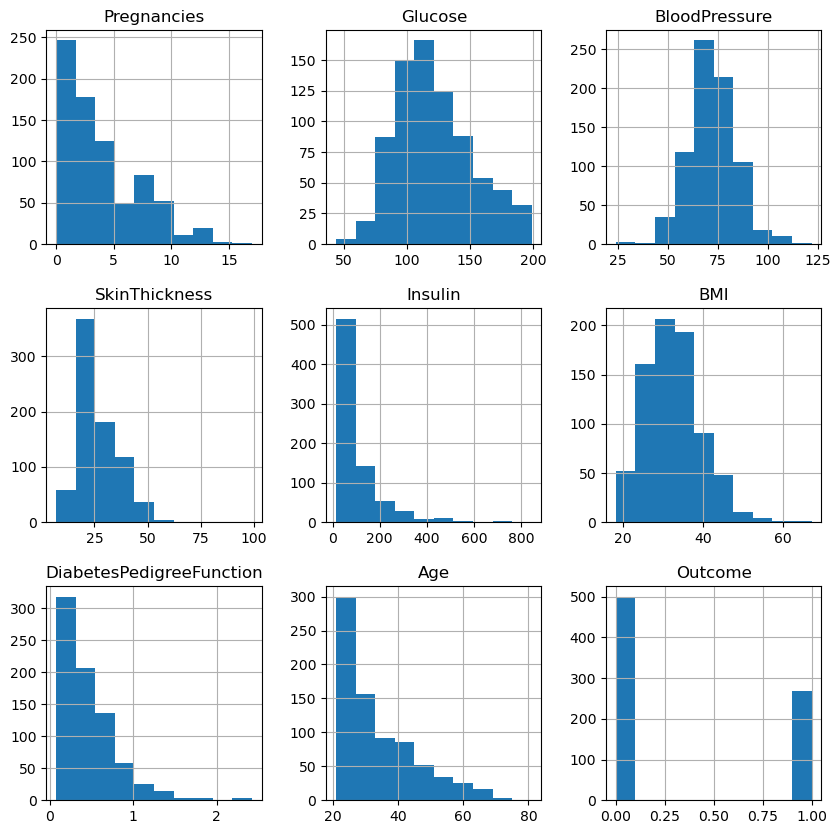

In [15]:
df.hist(bins=10,figsize=(10,10))
plt.show()

### Conclusion:
In almost all the features outliers are present & it play an important role in model building. So we want to remove outliers.But it loss the data so we wants to deal with outliers.We observe that only `glucose and Blood Pressure` are normally distributed rest others are skewed and have outliers.

<Axes: xlabel='DiabetesPedigreeFunction'>

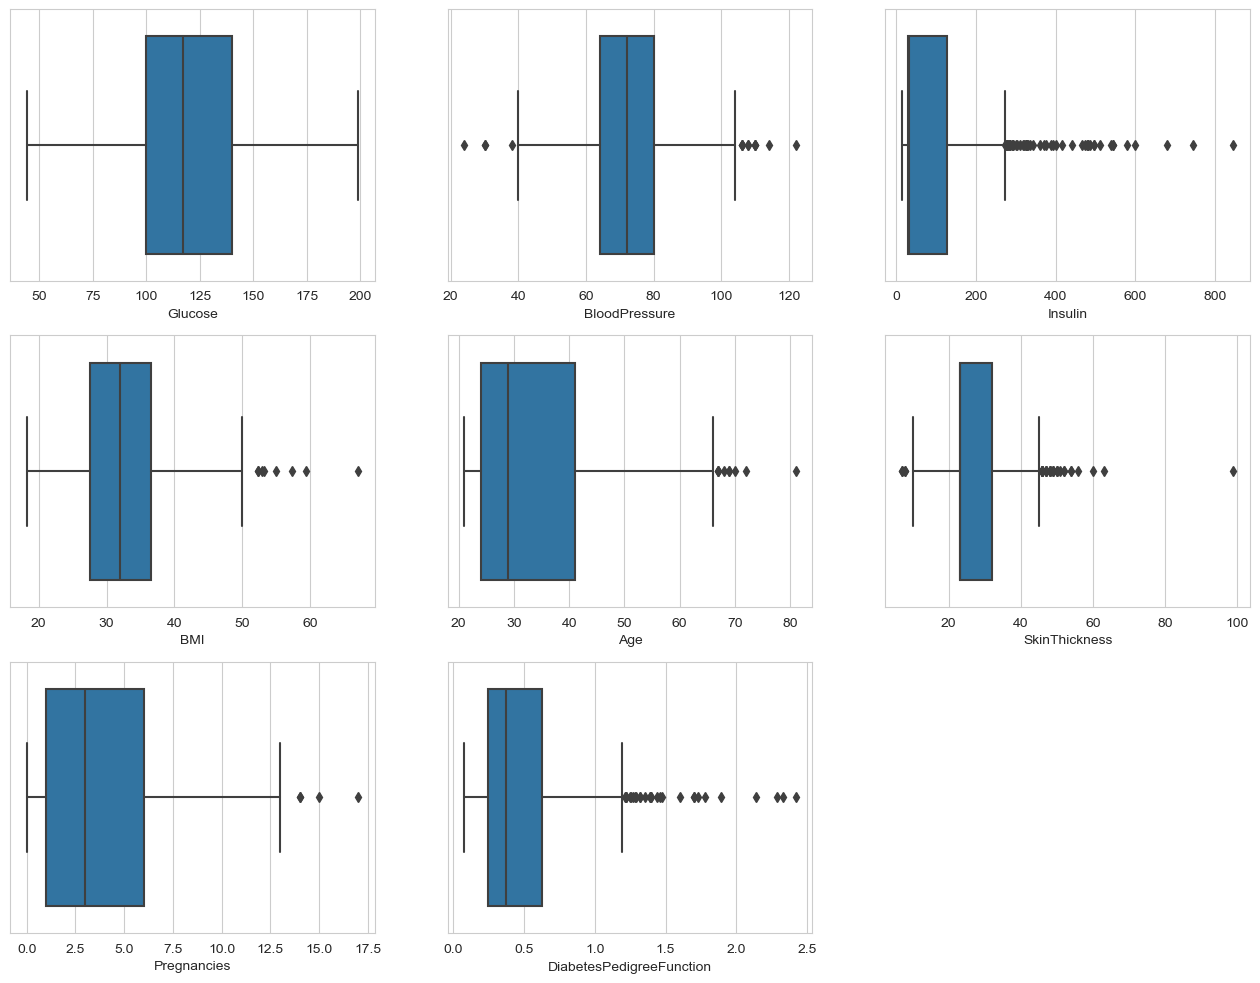

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

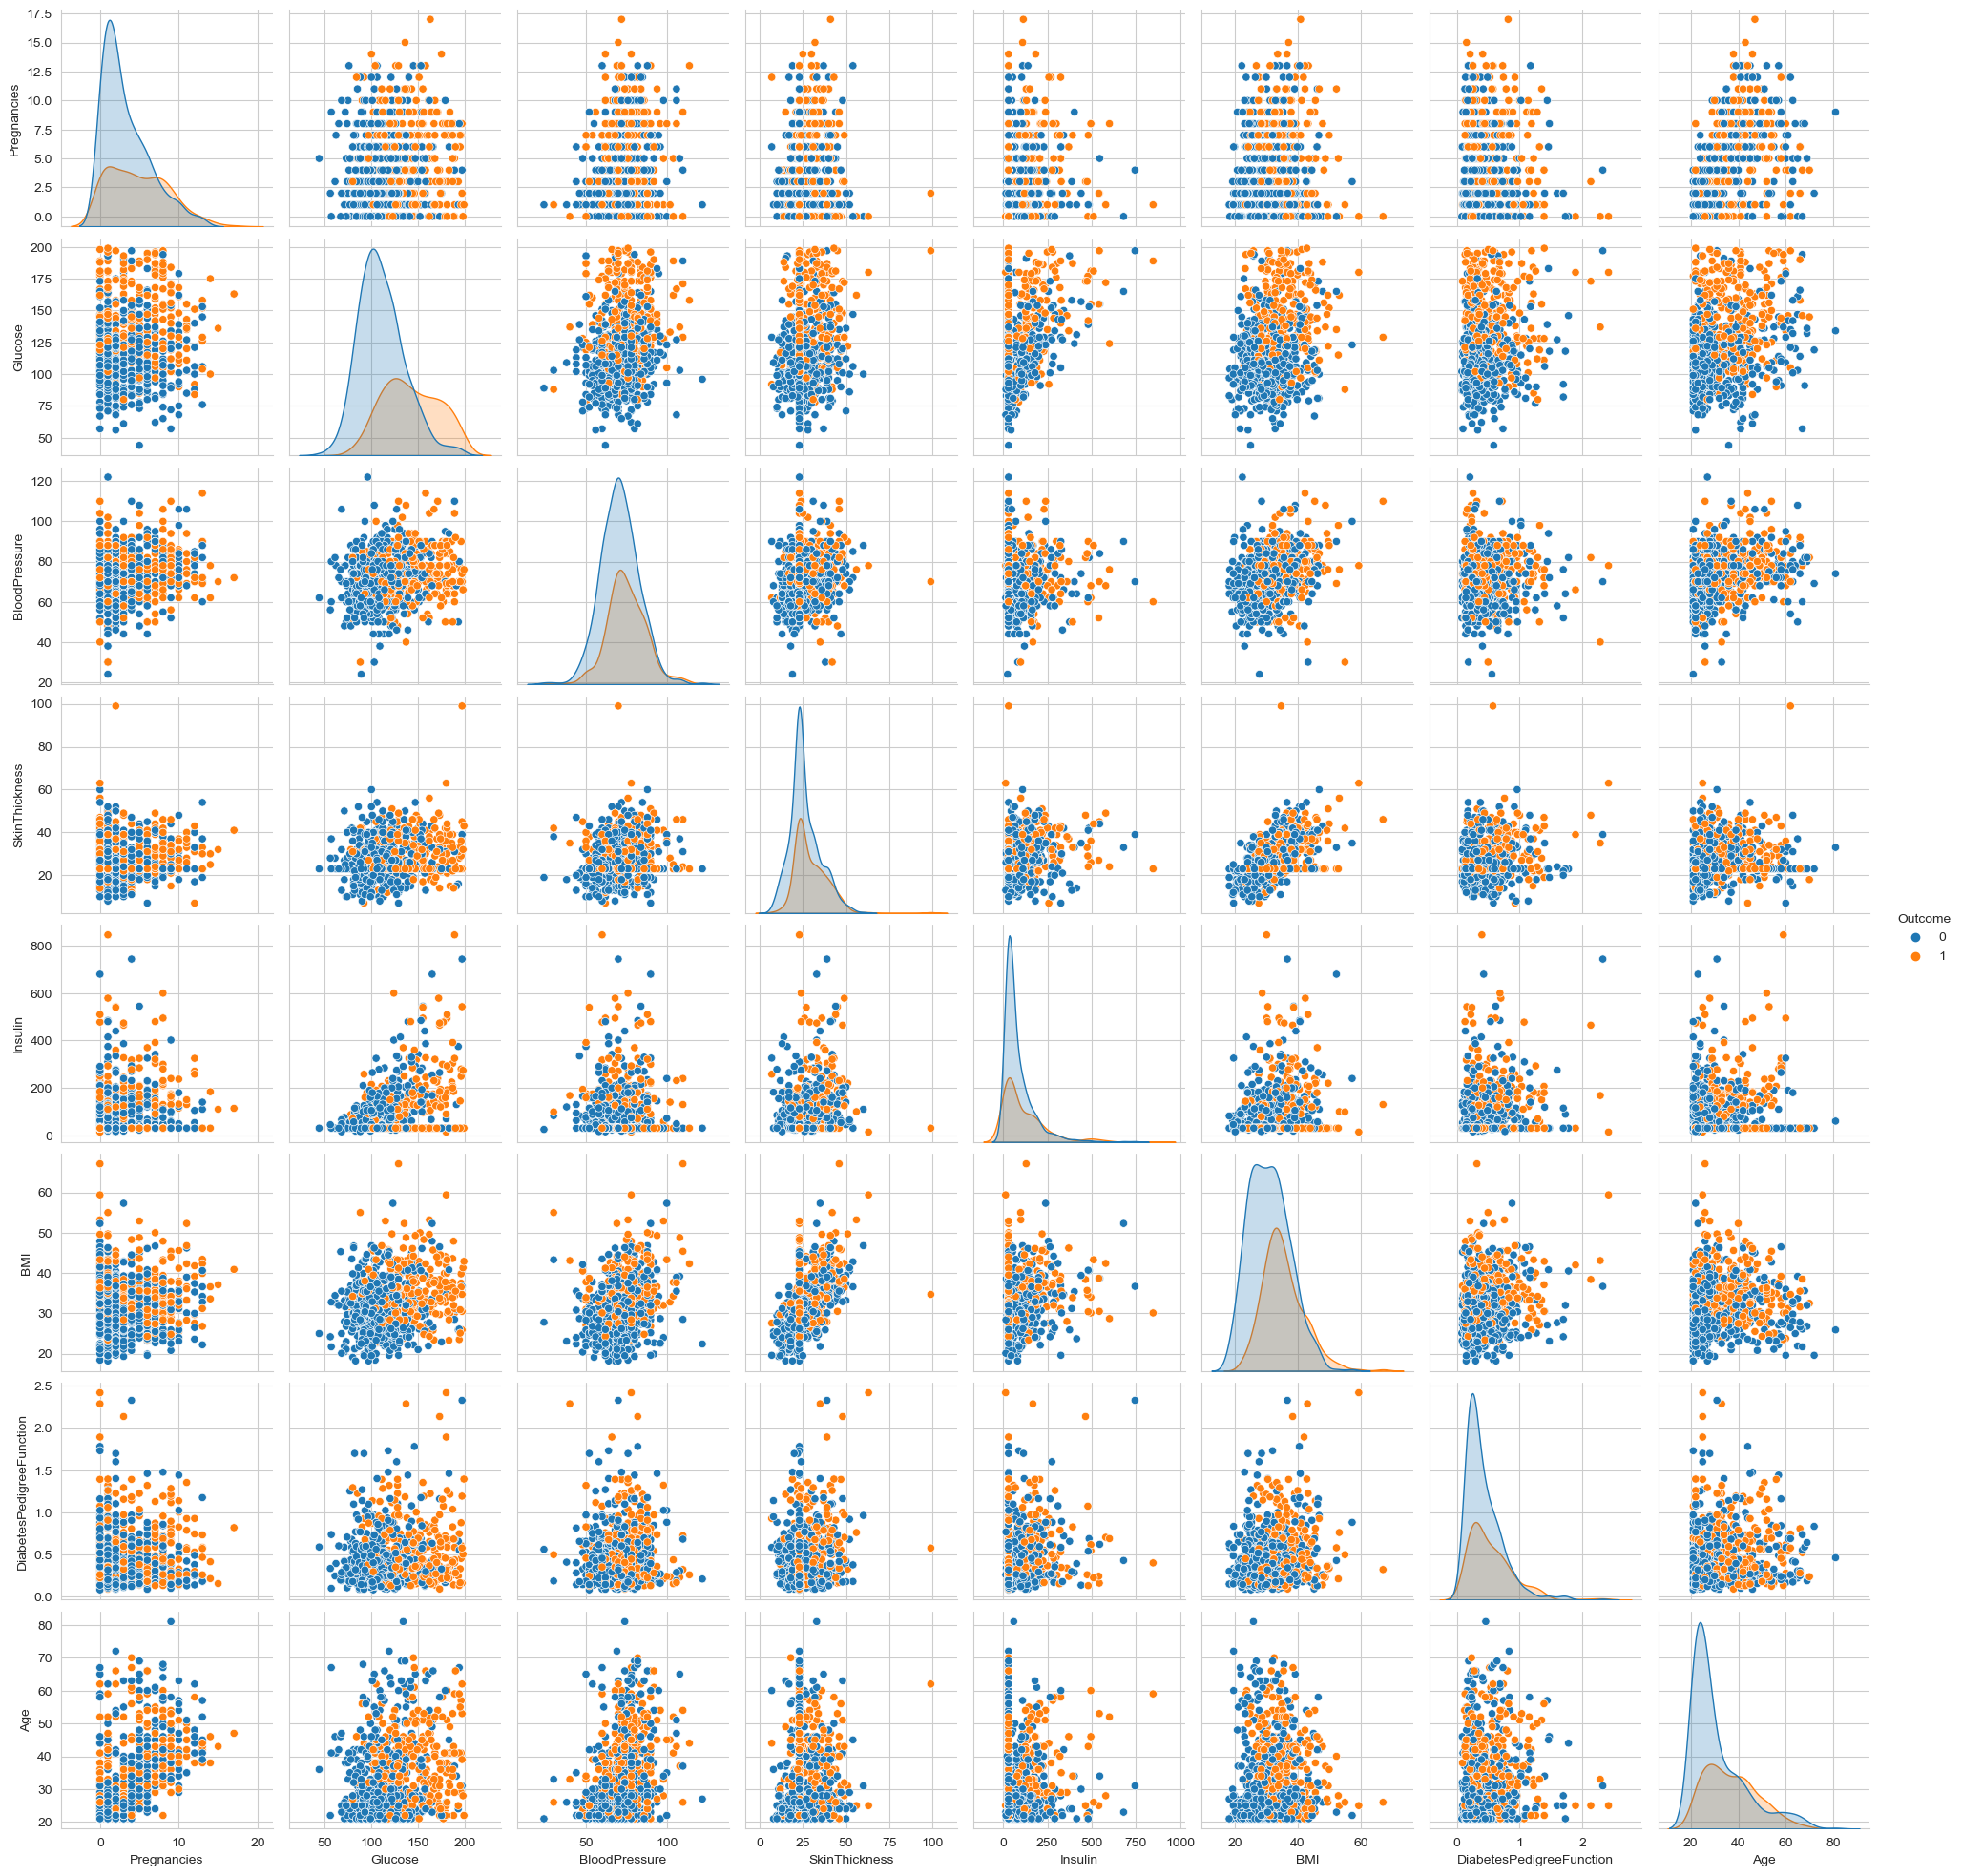

In [17]:
sns.pairplot(df,hue="Outcome")

**Pearson's Correlation Coefficient :-** Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

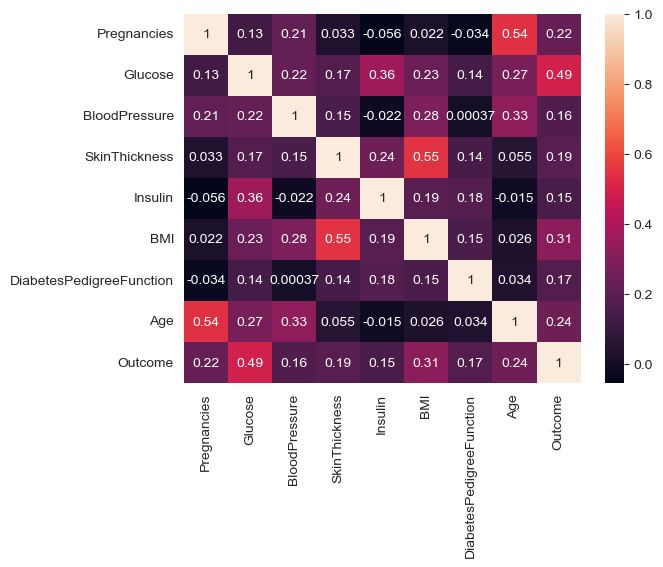

In [18]:
sns.heatmap(df.corr(),annot=True)

### Conclusion:
`Glucose` with outcome has maximum correlation among all features.`Blood Pressure & outcome` have less correlated to each others.

# 5. Handling Outliers <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]]
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


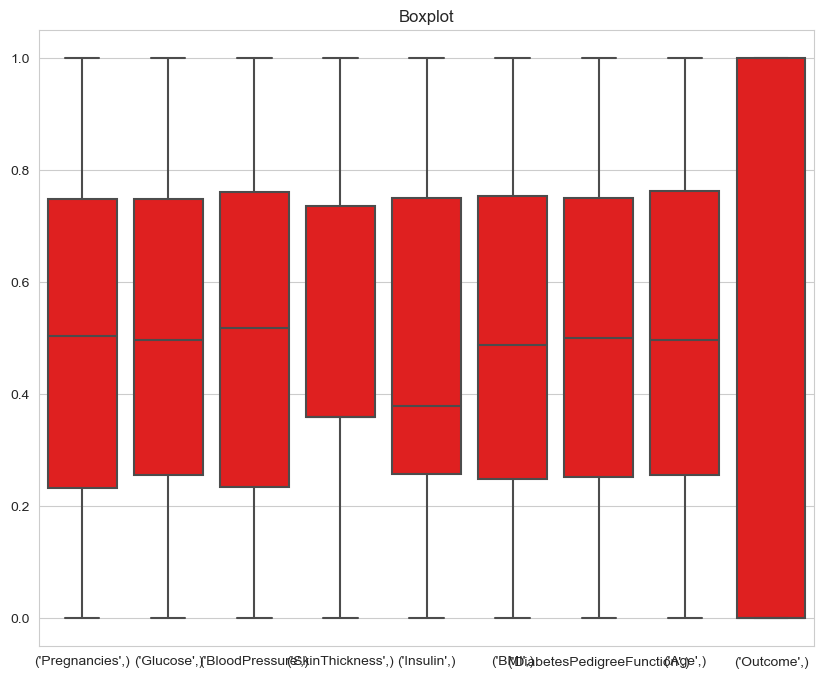

In [20]:
plt.figure(figsize=(10,8))
sns.set_style(style='whitegrid')
sns.boxplot(data=df_new,orient="v",color="red")
plt.title("Boxplot")
plt.show()

### Conclusion:
We remove the outliers.

# 6. Split the Data Frame into X and y <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
print(x) # contains only independent features 
print(y) #contains dependent feature

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

# 7. TRAIN TEST SPLIT <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [25]:
x_test.shape,y_test.shape

((154, 8), (154,))

# 8. Build the Classification Algorithm <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

- KNN
- Decision Tree
- Random Forest
- SVM
- Logistic Regression
- Naive Bayes

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV

**1. What Is Hyperparameter Tuning?**

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. 

**2. What is GridSearch ?**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What Steps To Follow For Hyper Parameter Tuning?**

1. Select the type of model we want to use like RandomForestClassifier, regressor or any other model
2. Check what are the parameters of the model
3. Select the methods for searching the hyperparameter
4. Select the cross-validation approach
5. Evaluate the model using the score

#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
- **Confusion Matrix :-**
It is a tabular visualization of the model predictions versus the ground-truth labels.

![Confusion matrix](https://ars.els-cdn.com/content/image/3-s2.0-B9780323911979000138-f14-09-9780323911979.jpg)


- **Precision Score :-**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

![Precision Score](https://blog.roboflow.com/content/images/size/w1000/2022/03/precision-formula.png)


- **Recall Score :-**
It is the fraction of positives/negative events that you predicted correctly. 

![Recall Score](https://blog.roboflow.com/content/images/size/w1000/2022/03/recall_formula.png)


- **F1 Score :-**
It’s the harmonic mean between precision and recall.

![F1 Score](https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png)

#### I've given preference to F1 Scoring because :- 
​
1. When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.
​
2. F1-score is a better metric when there are imbalanced classes as in the above case.
​
3. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall
​

## 8.1 KNN

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

![kNN](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [27]:
knn=KNeighborsClassifier(n_jobs=-1)

param_grid={"n_neighbors": np.arange(10,20),'weights' :(['uniform', 'distance']),'metric':( ['euclidean', 'manhattan', 'minkowski'])} 
cv=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(knn,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1",) 

grid_search.fit(x_train,y_train) 

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1', verbose=1)

In [28]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [29]:
grid_search.best_score_

0.5944289016778296

**b. Fit Best Model**

In [30]:
knn=KNeighborsClassifier(n_neighbors=11,metric='euclidean',weights ='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

**c. Predictiction on data using that model**

In [31]:
# Predict on testing data 
knn_predictions=knn.predict(x_test)
test_accuracy=accuracy_score(y_test,knn_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
knn_train_predictions=knn.predict(x_train)
train_accuracy=accuracy_score(y_train,knn_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.7532467532467533
Train Accuracy of the model :- 0.7752442996742671


In [32]:
scores=cross_val_score(knn,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.74193548 0.66129032 0.70967742 0.77419355 0.72131148 0.78688525
 0.73770492 0.67213115 0.80327869 0.72131148]
0.7329719725013221


**d. Performance Metrics**

##### Confusion Matrix

In [33]:
cm=confusion_matrix(y_test,knn_predictions)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[89 18]
 [20 27]]


In [34]:
pd.DataFrame(cm,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,89,18
No,20,27


##### Precision Score

In [35]:
print(precision_score(y_test,knn_predictions,pos_label=1.0))
print(precision_score(y_test,knn_predictions,pos_label=0.0))

0.6
0.8165137614678899


##### Recall Score

In [36]:
print(recall_score(y_test,knn_predictions,pos_label=1.0))
print(recall_score(y_test,knn_predictions,pos_label=0.0))

0.574468085106383
0.8317757009345794


##### F1 Score

In [37]:
print(f1_score(y_test,knn_predictions,pos_label=1.0))
print(f1_score(y_test,knn_predictions,pos_label=0.0))

0.5869565217391305
0.8240740740740741


##### Classification Report

In [38]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       107
           1       0.60      0.57      0.59        47

    accuracy                           0.75       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154



### Conclusion:
It can predict correctly diabetes person 59% & no diabetes person 82%.Our data is unbalance(**107 person are not diabete & 47 person are diabete**). so these imbalanced prediction happen.`Accuracy is 75%`.

## 8.2 Decision Tree

It is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

![Decision Tree](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [40]:
DT=DecisionTreeClassifier()
param_grid={"max_depth": np.arange(1,15),'criterion': ["gini", "entropy"],'max_features' :["auto", "sqrt", "log2"],'random_state':np.arange(1,100,2)}
cv=StratifiedKFold(n_splits=10)
grid_search1=GridSearchCV(DT,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1",) 

grid_search1.fit(x_train,y_train) 

Fitting 10 folds for each of 4200 candidates, totalling 42000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, scoring='f1', verbose=1)

In [41]:
grid_search1.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'random_state': 57}

In [42]:
grid_search1.best_score_

0.6848004388934923

**b. Fit Best Model**

In [43]:
DT= DecisionTreeClassifier(max_depth = 4, criterion='entropy',max_features='log2',random_state=57)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=57)

**c. Prediction on data using that model**

In [44]:
# Predict on testing data 
DT_predictions=DT.predict(x_test)
test_accuracy=accuracy_score(y_test,DT_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
DT_train_predictions=DT.predict(x_train)
train_accuracy=accuracy_score(y_train,DT_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.7597402597402597
Train Accuracy of the model :- 0.7785016286644951


In [45]:
scores=cross_val_score(DT,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.72580645 0.79032258 0.80645161 0.82258065 0.72131148 0.75409836
 0.75409836 0.63934426 0.81967213 0.75409836]
0.7587784241142252


**d. Performance Metrics**

##### Confusion Matrix

In [46]:
cm1=confusion_matrix(y_test,DT_predictions)
print("Confusion Matrix : \n",cm1)

Confusion Matrix : 
 [[81 26]
 [11 36]]


In [47]:
pd.DataFrame(cm1,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,81,26
No,11,36


##### Precision Score

In [48]:
print(precision_score(y_test,DT_predictions,pos_label=1.0))
print(precision_score(y_test,DT_predictions,pos_label=0.0))

0.5806451612903226
0.8804347826086957


##### Recall Score

In [49]:
print(recall_score(y_test,DT_predictions,pos_label=1.0))
print(recall_score(y_test,DT_predictions,pos_label=0.0))

0.7659574468085106
0.7570093457943925


##### f1 Score

In [50]:
print(f1_score(y_test,DT_predictions,pos_label=1.0))
print(f1_score(y_test,DT_predictions,pos_label=0.0))

0.6605504587155964
0.814070351758794


##### Classification Report

In [51]:
print(classification_report(y_test,DT_predictions))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       107
           1       0.58      0.77      0.66        47

    accuracy                           0.76       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.76      0.77       154



### Conclusion:
It can predict correctly diabetes person 66% & no diabetes person 81%.Our data is unbalance(107 person are not diabete & 47 person are diabete). so these imbalanced prediction happen.`Accuracy is 77%`.

## 8.3 Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

![Random Forest](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

In [92]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [93]:
RF=RandomForestClassifier(n_jobs=-1)
param_grid={"n_estimators": np.arange(1,15),"max_depth": np.arange(1,15),'criterion': ["gini", "entropy"],'max_features' :["auto", "sqrt", "log2"],'random_state':np.arange(1,100,5)} 
cv=StratifiedKFold(n_splits=10)
grid_search2=GridSearchCV(RF,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1",) 

grid_search2.fit(x_train,y_train) 

Fitting 10 folds for each of 23520 candidates, totalling 235200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             return_train_score=True, scoring='f1', verbose=1)

In [94]:
grid_search2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 7,
 'random_state': 66}

In [95]:
grid_search2.best_score_

0.6792593361063639

**b. Fit Best Model**

In [96]:
RF=RandomForestClassifier(n_estimators=7,max_depth=8 ,criterion='gini',max_features='log2',random_state=66)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=7,
                       random_state=66)

**c. Prediction on data using that model**

In [97]:
# Predict on testing data 
RF_predictions=RF.predict(x_test)
test_accuracy=accuracy_score(y_test,RF_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
RF_train_predictions=RF.predict(x_train)
train_accuracy=accuracy_score(y_train,RF_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.8051948051948052
Train Accuracy of the model :- 0.9299674267100977


In [98]:
scores=cross_val_score(RF,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.72580645 0.77419355 0.83870968 0.87096774 0.70491803 0.86885246
 0.72131148 0.70491803 0.78688525 0.80327869]
0.7799841353781068


**d. Performance Metrics**

##### Confusion Matrix

In [99]:
cm2=confusion_matrix(y_test,RF_predictions)
print("Confusion Matrix : \n",cm2)

Confusion Matrix : 
 [[89 18]
 [12 35]]


In [100]:
pd.DataFrame(cm2,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,89,18
No,12,35


##### Precision Score

In [101]:
print(precision_score(y_test,RF_predictions,pos_label=1.0))
print(precision_score(y_test,RF_predictions,pos_label=0.0))

0.660377358490566
0.8811881188118812


##### Recall Score

In [102]:
print(recall_score(y_test,RF_predictions,pos_label=1.0))
print(recall_score(y_test,RF_predictions,pos_label=0.0))

0.7446808510638298
0.8317757009345794


##### f1 Score

In [103]:
print(f1_score(y_test,RF_predictions,pos_label=1.0))
print(f1_score(y_test,RF_predictions,pos_label=0.0))

0.7
0.8557692307692306


##### Classification Report

In [104]:
print(classification_report(y_test,RF_predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.66      0.74      0.70        47

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.81      0.81      0.81       154



### Conclusion:
It can predict correctly diabetes person 70% & no diabetes person 86%.Our data is unbalance(107 person are not diabete & 47 person are diabete). so these imbalanced prediction happen.Accuracy is 81%.

## 8.4 Support Vector Machine

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

![Support Vector Machine](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png)

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [53]:
svm=SVC()
param_grid={'kernel': ['poly', 'rbf', 'sigmoid'],'C' :[50, 10, 1.0, 0.1, 0.01],'random_state':np.arange(1,100,2)} 
cv=StratifiedKFold(n_splits=10)
grid_search3=GridSearchCV(svm,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1",) 

grid_search3.fit(x_train,y_train) 

Fitting 10 folds for each of 750 candidates, totalling 7500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'random_state': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, scoring='f1', verbose=1)

In [54]:
grid_search3.best_params_

{'C': 50, 'kernel': 'poly', 'random_state': 1}

In [55]:
grid_search3.best_score_

0.5933264987095181

**b. Fit Best Model**

In [56]:
svm=SVC(C=50,kernel='poly',random_state=1)
svm.fit(x_train,y_train)

SVC(C=50, kernel='poly', random_state=1)

**c. Prediction on data using that model**

In [57]:
# Predict on testing data 
svm_predictions=svm.predict(x_test)
test_accuracy=accuracy_score(y_test,svm_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
svm_train_predictions=svm.predict(x_train)
train_accuracy=accuracy_score(y_train,svm_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.7987012987012987
Train Accuracy of the model :- 0.7768729641693811


In [58]:
scores=cross_val_score(svm,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.74193548 0.72580645 0.77419355 0.83870968 0.68852459 0.83606557
 0.70491803 0.6557377  0.7704918  0.75409836]
0.7490481226864093


**d. Performance Metrics**

##### Confusion Matrix

In [59]:
cm3=confusion_matrix(y_test,svm_predictions)
print("Confusion Matrix : \n",cm3)

Confusion Matrix : 
 [[98  9]
 [22 25]]


In [60]:
pd.DataFrame(cm3,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,98,9
No,22,25


##### Precision Score

In [61]:
print(precision_score(y_test,svm_predictions,pos_label=1.0))
print(precision_score(y_test,svm_predictions,pos_label=0.0))

0.7352941176470589
0.8166666666666667


##### Recall Score

In [62]:
print(recall_score(y_test,svm_predictions,pos_label=1.0))
print(recall_score(y_test,svm_predictions,pos_label=0.0))

0.5319148936170213
0.9158878504672897


##### f1 Score

In [63]:
print(f1_score(y_test,svm_predictions,pos_label=1.0))
print(f1_score(y_test,svm_predictions,pos_label=0.0))

0.617283950617284
0.8634361233480176


##### Classification Report

In [64]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       107
           1       0.74      0.53      0.62        47

    accuracy                           0.80       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.79      0.80      0.79       154



### Conclusion:
It can predict correctly diabetes person 62% & no diabetes person 86%.Our data is unbalance(107 person are not diabete & 47 person are diabete). so these imbalanced prediction happen.Accuracy is 79%.

# 8.5 Logistic Regression:- 
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no." 

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

![Logistic Regression](https://pimages.toolbox.com/wp-content/uploads/2022/04/11040522/46-4.png)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [66]:
LoR=LogisticRegression(n_jobs=-1)
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['None', 'l1', 'l2', 'elasticnet'],'C' :[50, 10, 1.0, 0.1, 0.01],'random_state':np.arange(1,100,2)} 
cv=StratifiedKFold(n_splits=10)
grid_search4=GridSearchCV(LoR,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1",) 

grid_search4.fit(x_train,y_train) 

Fitting 10 folds for each of 3000 candidates, totalling 30000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01],
                         'penalty': ['None', 'l1', 'l2', 'elasticnet'],
                         'random_state': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='f1', verbose=1)

In [67]:
grid_search4.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs'}

In [68]:
grid_search4.best_score_

0.6373337976581551

**b. Fit Best Model**

In [69]:
LoR=LogisticRegression(C=1,penalty='l2',solver='lbfgs',random_state=1)
LoR.fit(x_train,y_train)

LogisticRegression(C=1, random_state=1)

**c. Prediction on data using that model**

In [70]:
# Predict on testing data 
LoR_predictions=LoR.predict(x_test)
test_accuracy=accuracy_score(y_test,LoR_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
LoR_train_predictions=LoR.predict(x_train)
train_accuracy=accuracy_score(y_train,LoR_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.7922077922077922
Train Accuracy of the model :- 0.760586319218241


In [71]:
scores=cross_val_score(LoR,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.77419355 0.75806452 0.83870968 0.80645161 0.73770492 0.80327869
 0.7704918  0.6557377  0.81967213 0.72131148]
0.7685616076150185


**d. Performance Metrics**

##### Confusion Matrix

In [72]:
cm4=confusion_matrix(y_test,LoR_predictions)
print("Confusion Matrix : \n",cm4)

Confusion Matrix : 
 [[94 13]
 [19 28]]


In [73]:
pd.DataFrame(cm4,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,94,13
No,19,28


##### Precision Score

In [74]:
print(precision_score(y_test,LoR_predictions,pos_label=1.0))
print(precision_score(y_test,LoR_predictions,pos_label=0.0))

0.6829268292682927
0.831858407079646


##### Recall Score

In [75]:
print(recall_score(y_test,LoR_predictions,pos_label=1.0))
print(recall_score(y_test,LoR_predictions,pos_label=0.0))

0.5957446808510638
0.8785046728971962


##### f1 Score

In [76]:
print(f1_score(y_test,LoR_predictions,pos_label=1.0))
print(f1_score(y_test,LoR_predictions,pos_label=0.0))

0.6363636363636364
0.8545454545454546


##### Classification Report

In [77]:
print(classification_report(y_test,LoR_predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



### Conclusion:
It can predict correctly diabetes person 64% & no diabetes person 85%.Our data is unbalance(107 person are not diabete & 47 person are diabete). so these imbalanced prediction happen.Accuracy is 79%.

# 8.6 Naive Bayes :-
​
Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result.

![Naive Bayes](https://editor.analyticsvidhya.com/uploads/23385Capture6.PNG)

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**a. Hyper Parameter Tuning using GridSearch CV**

In [79]:
NB=GaussianNB()
param_grid={'var_smoothing': np.logspace(0,-9, num=100)} 
cv=StratifiedKFold(n_splits=10)
grid_search5=GridSearchCV(NB,param_grid,return_train_score=True,cv=cv,verbose=1, n_jobs=-1,scoring="f1") 

grid_search5.fit(x_train,y_train) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='f1', verbose=1)

In [80]:
grid_search5.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [81]:
grid_search5.best_score_

0.6261125571117733

**b. Fit Best Model**

In [82]:
NB=GaussianNB(var_smoothing=5.336699231206313e-06)
NB.fit(x_train,y_train)

GaussianNB(var_smoothing=5.336699231206313e-06)

**c. Prediction on data using that model**

In [83]:
# Predict on testing data 
NB_predictions=NB.predict(x_test)
test_accuracy=accuracy_score(y_test,NB_predictions)
print("Test Accuracy of the model :-",test_accuracy)

#Predict on training data
NB_train_predictions=NB.predict(x_train)
train_accuracy=accuracy_score(y_train,NB_train_predictions)
print("Train Accuracy of the model :-",train_accuracy)

Test Accuracy of the model :- 0.7987012987012987
Train Accuracy of the model :- 0.754071661237785


In [84]:
scores=cross_val_score(NB,x_train,y_train,cv=cv)
print(scores)
print(np.mean(scores))

[0.70967742 0.70967742 0.77419355 0.79032258 0.68852459 0.83606557
 0.80327869 0.6557377  0.73770492 0.73770492]
0.7442887361184558


**d. Performance Metrics**

##### Confusion Matrix

In [85]:
cm5=confusion_matrix(y_test,NB_predictions)
print("Confusion Matrix : \n",cm5)

Confusion Matrix : 
 [[94 13]
 [18 29]]


In [86]:
pd.DataFrame(cm5,columns=["Yes","No"],index=["Yes","No"])

,Yes,No
Yes,94,13
No,18,29


##### Precision Score

In [87]:
print(precision_score(y_test,NB_predictions,pos_label=1.0))
print(precision_score(y_test,NB_predictions,pos_label=0.0))

0.6904761904761905
0.8392857142857143


##### Recall Score

In [88]:
print(recall_score(y_test,NB_predictions,pos_label=1.0))
print(recall_score(y_test,NB_predictions,pos_label=0.0))

0.6170212765957447
0.8785046728971962


##### f1 Score

In [89]:
print(f1_score(y_test,NB_predictions,pos_label=1.0))
print(f1_score(y_test,NB_predictions,pos_label=0.0))

0.651685393258427
0.8584474885844748


##### Classification Report

In [90]:
print(classification_report(y_test,NB_predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



### Conclusion:
It can predict correctly diabetes person 65% & no diabetes person 86%.Our data is unbalance(107 person are not diabete & 47 person are diabete). so these imbalanced prediction happen.`Accuracy is 80%`.

# 9.Result and Conclusion: <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

- In this project, I have implemented the most popular supervised classification algorithms like `KNN` , `Decision Tree` , `Random Forest` , `SVM` , `Logistic Regression` , `Naive Bayes`.

- I have applied the `Grid Search Cv` and find that hyperparameter to each algorithm can be considered a good parameter this data.

- I have find that the model has very high accuracy with 81 % by `Random Forest` model. So, this is not a good model fit to the data.

- I have achieved a very weak accuracy with 75 %  by our `k-NN` model.

- Although accuracy is 81% but it is not good in medical field because one wrong prediction measure effects on patient.